In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

## Multi variable linear regression.

First let's load own data.

In [2]:
data = np.loadtxt('data/RegLinMultVar.txt', delimiter=',')
X = np.c_[data[:,0], data[:, 1]]
y = np.c_[data[:,2]]
m = y.size
print(data[:5, :])

[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]


### Normalization.
Data is in different numerical interval. To deal withgh this we will use process named normalization. In this case we will 
subtract form every column a mean value of those columns and then divade it by standard devation.

In [3]:
mean = 0
st_dev = 0
X = X
mean = np.mean(X, axis = 0)
st_dev = np.std(X, axis = 0)
X = (X - mean)/st_dev

After this is time to add 'ones' vector in front of the data.

In [4]:
X = np.c_[np.ones(m), X]

In [5]:
print(X[:5, :])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


Loss function

In [6]:
def computeCostMult(X, y, theta):
    J = 0
    J = np.dot(X,theta)
    J1 = np.transpose(J-y)
    J2 = J-y
    J = np.dot(J1,J2)
    J = J/(2*m)
    return(J)

Optimizer

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    theta = np.zeros((3, 1))
    for iter in np.arange(num_iters):
        J = np.dot(X,theta)
        J1 = np.dot(np.transpose(X),J - y)
        J = J1/m
        theta = theta - (alpha * J) 
        
        J_history[iter] = computeCostMult(X, y, theta)
    return(theta, J_history)

Let's take a look at predicted theta's

In [9]:
theta , Cost_J = gradientDescent(X, y, theta, alpha, num_iters)
print('theta: ',theta.ravel())

theta:  [334302.06399328  99411.44947359   3267.01285407]


To be shur that training goes well, let's plot loss function 

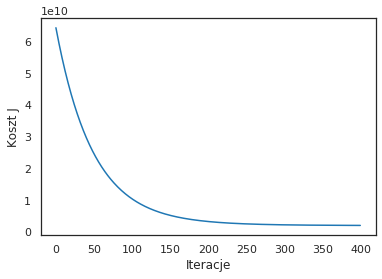

In [10]:
plt.plot(Cost_J)
plt.ylabel('Koszt J')
plt.xlabel('Iteracje');

Now we can use the $\theta$ parameters to predict price of flat with an area 1650 ft$^2$ and 3 rooms.

In [11]:
powierzchnia = (1650 - mean[0])/st_dev[0]
il_pok = (3 - mean[1])/st_dev[1] 
cena = 1*theta[0] + powierzchnia*theta[1] + il_pok*theta[2] 
cena

array([289221.54737122])

## Normal equations

Other way to do the same thing is normal equations: $\theta = (X^TX)^{-1} X^Ty$. In this case we don't have to normalize data, so we will reload the data. 

In [12]:
data = np.loadtxt('data/RegLinMultVar.txt', delimiter=',')
X = np.c_[data[:,0], data[:, 1]]
y = np.c_[data[:,2]]
m = y.size
X = np.c_[np.ones(m), X]
theta = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),y))
theta.ravel()

array([89597.9095428 ,   139.21067402, -8738.01911233])

Now we will use this model to predict value of the same flat.

In [13]:
cena = theta[0]*1 + theta[1]*1650 + theta[2]*3
cena[0]

293081.4643348973